# Setup and Imports

In [28]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Algorithm Implementation(s)

In [29]:
class Sorting:

    def __init__(self):
        self.unsorted_arrays = []
        self.sorted_arrays = []
        self.unsorted_array = []
        self.algorithms = {
            "1": self.bubble_sort,
            "2": self.selection_sort,
            "3": self.insertion_sort,
            "4": self.merge_sort,
            "5": self.quick_sort,
            "6": self.heap_sort,
            "7": self.counting_sort,
            "8": self.radix_sort,
            "9": self.bucket_sort
        }

    def bubble_sort(self, arr):
        """Bubble Sort Algorithm"""
        n = len(arr)

        for i in range(n):
        
            for j in range(0, n - i - 1):
        
                if arr[j] > arr[j + 1]:
                    arr[j], arr[j + 1] = arr[j + 1], arr[j]  # Swapping

        return arr

    def selection_sort(self, arr):
        """Selection Sort Algorithm"""
        n = len(arr)

        for i in range(n):
            min_index = i
        
            for j in range(i + 1, n):
        
                if arr[j] < arr[min_index]:
                    min_index = j
        
            arr[i], arr[min_index] = arr[min_index], arr[i]  # Swapping
        
        return arr

    def insertion_sort(self, arr):
        """Insertion Sort Algorithm"""
        for i in range(1, len(arr)):
            key = arr[i]
            j = i - 1

            while j >= 0 and key < arr[j]:
                arr[j + 1] = arr[j]
                j -= 1
            
            arr[j + 1] = key

        return arr

    def merge_sort(self, arr):
        """Merge Sort Algorithm"""
        if len(arr) > 1:
            mid = len(arr) // 2
            left_half = arr[:mid]
            right_half = arr[mid:]

            self.merge_sort(left_half)
            self.merge_sort(right_half)

            i = j = k = 0

            while i < len(left_half) and j < len(right_half):

                if left_half[i] < right_half[j]:
                    arr[k] = left_half[i]
                    i += 1
                else:
                    arr[k] = right_half[j]
                    j += 1
                
                k += 1

            while i < len(left_half):
                arr[k] = left_half[i]
                i += 1
                k += 1

            while j < len(right_half):
                arr[k] = right_half[j]
                j += 1
                k += 1

        return arr

    def quick_sort(self, arr):
        """Quick Sort Algorithm"""
        if len(arr) <= 1:
            return arr
        
        pivot = arr[len(arr) // 2]
        left = [x for x in arr if x < pivot]
        middle = [x for x in arr if x == pivot]
        right = [x for x in arr if x > pivot]
        
        return self.quick_sort(left) + middle + self.quick_sort(right)

    def heap_sort(self, arr):
        """Heap Sort Algorithm"""
        def heapify(arr, n, i):
            largest = i
            left = 2 * i + 1
            right = 2 * i + 2

            if left < n and arr[left] > arr[largest]:
                largest = left

            if right < n and arr[right] > arr[largest]:
                largest = right

            if largest != i:
                arr[i], arr[largest] = arr[largest], arr[i]  # Swapping
                heapify(arr, n, largest)

        n = len(arr)

        # Building a maxheap
        for i in range(n // 2 - 1, -1, -1):
            heapify(arr, n, i)

        # One by one extract elements from heap
        for i in range(n - 1, 0, -1):
            arr[i], arr[0] = arr[0], arr[i]  # Swapping
            heapify(arr, i, 0)

        return arr

    def counting_sort(self, arr):
        """Counting Sort Algorithm"""
        max_val = max(arr)
        count = [0] * (max_val + 1)

        for num in arr:
            count[num] += 1

        sorted_index = 0
        for i, c in enumerate(count):

            for _ in range(c):
                arr[sorted_index] = i
                sorted_index += 1

        return arr

    def radix_sort(self, arr):
        """Radix Sort Algorithm"""
        def counting_sort_for_radix(arr, exp):
            n = len(arr)
            output = [0] * n
            count = [0] * 10

            for i in range(n):
                index = arr[i] // exp
                count[index % 10] += 1

            for i in range(1, 10):
                count[i] += count[i - 1]

            for i in range(n - 1, -1, -1):
                index = arr[i] // exp
                output[count[index % 10] - 1] = arr[i]
                count[index % 10] -= 1

            for i in range(n):
                arr[i] = output[i]

        max_num = max(arr)
        exp = 1

        while max_num // exp > 0:
            counting_sort_for_radix(arr, exp)
            exp *= 10
        
        return arr

    def bucket_sort(self, arr):
        """Bucket Sort Algorithm"""
        if len(arr) == 0:
            return arr

        # Creating buckets
        max_value = max(arr)
        bucket_count = len(arr) // 5
        buckets = [[] for _ in range(bucket_count)]

        # Distributing input array values into buckets
        for num in arr:
            index = min(num * bucket_count // (max_value + 1), bucket_count - 1)
            buckets[index].append(num)

        # Sorting each bucket and concatenate
        sorted_arr = []
        for bucket in buckets:
            sorted_arr.extend(sorted(bucket))

        return sorted_arr

    def generate_random_data(self, size):
        """Generates a random list of specified size sorted in descending order."""
        
        return [random.randint(1, 1000000) for _ in range(size)]

    def measure_execution_time(self, sorting_algorithm, arr):
        """Measures the execution time of the specified sorting algorithm on the given array."""
        start_time = time.time()

        self.sorted_arrays.append(sorting_algorithm(arr))
        
        end_time = time.time()
        
        return (end_time - start_time) * 1000  # Converting it to milliseconds

    def evaluate_algorithms(self, sizes):
        """Evaluates all sorting algorithms on the specified array sizes and returns the results as a DataFrame."""
        results = {}

        for size in tqdm(sizes):
            arr = self.generate_random_data(size)

            self.unsorted_arrays.append(arr)

            results[size] = {
                'Bubble Sort': self.measure_execution_time(self.bubble_sort, arr.copy()),
                'Selection Sort': self.measure_execution_time(self.selection_sort, arr.copy()),
                'Insertion Sort': self.measure_execution_time(self.insertion_sort, arr.copy()),
                'Merge Sort': self.measure_execution_time(self.merge_sort, arr.copy()),
                'Quick Sort': self.measure_execution_time(self.quick_sort, arr.copy()),
                'Heap Sort': self.measure_execution_time(self.heap_sort, arr.copy()),
                'Counting Sort': self.measure_execution_time(self.counting_sort, arr.copy()),
                'Bucket Sort': self.measure_execution_time(self.bucket_sort, arr.copy()),
                'Radix Sort': self.measure_execution_time(self.radix_sort, arr.copy()),
            }

            # break;  # For, testing

        # Converting results to a DataFrame for easy viewing
        results_df = pd.DataFrame(results).T

        # results_df.to_csv("result.csv")

        return results_df, self.unsorted_arrays, self.sorted_arrays
    
    def evaluate_algorithms_choice_based(self, size, algorithm_choice, choice):
        """Evaluates all sorting algorithms on the specified array sizes and returns the results as a DataFrame."""
        results = {}

        arr = self.generate_random_data(size[0])

        self.unsorted_array.append(arr)

        results[size[0]] = {
            f'{algorithm_choice}': self.measure_execution_time(self.algorithms[choice], arr.copy())
        }

        # Converting results to a DataFrame for easy viewing
        results_df = pd.DataFrame(results).T

        results_df.to_csv("execution_time_results.csv")

        return results_df, self.unsorted_array[0], self.sorted_arrays[0]

### _Utility Functions_ 

In [30]:
def plot_execution_times(execution_times_df, file_name='sorting_execution_times.png'):
    """Creates a line plot to visualize the execution times of sorting algorithms."""
    plt.figure(figsize=(16, 10), dpi=150)  # Increased size and DPI for better visibility

    # Plotting each sorting algorithm's execution time
    for column in execution_times_df.columns:
        plt.plot(execution_times_df.index, execution_times_df[column], marker='o', label=column)

    # Adding labels and title
    plt.xlabel('Array Size', fontsize=14)
    plt.ylabel('Time Taken (ms)', fontsize=14)
    plt.title('Empirical Time Complexity of Sorting Algorithms', fontsize=16)
    plt.legend(title='Sorting Algorithms', fontsize=12)
    plt.grid(True)
    plt.xscale('log')  # Using a logarithmic scale for better visibility of larger sizes
    plt.yscale('log')  # Using logarithmic scale on y-axis to compress large differences
    plt.xticks(execution_times_df.index)  # Setting x-ticks to the original array sizes

    # # Saving the plot as an image
    # plt.savefig(file_name, format='png', dpi=300, bbox_inches='tight')  # Saving with high resolution

    # Showing the plot
    plt.show()

def plot_multiple_unsorted_lists(parent_list, sizes, file_name='unsorted_lists-SS.png'):
    """Plots each list within a parent list on a single plot, differentiating by color and adding legends."""
    
    plt.figure(figsize=(12, 8))
    
    # Plotting each list in the parent list
    for idx, sublist in enumerate(parent_list):
        plt.plot(sublist, label=f'Unsorted List for Size: {sizes[idx]}', marker='o')
    
    # Adding labels and title
    plt.xlabel('Index', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.title('Unsorted Lists', fontsize=16)
    
    # Adding a legend
    plt.legend(title='Unsorted Lists', fontsize=12)
    
    # Displaying the plot
    plt.grid(True)

    # # Saving the plot as an image
    # plt.savefig(file_name, format='png', dpi=300, bbox_inches='tight')  # Saving with high resolution

    # plt.show()

def plot_multiple_sorted_lists(parent_list, sizes, algorithm, file_name='Lists-SS.png'):
    """Plots each list within a parent list on a single plot, differentiating by color and adding legends."""
    
    plt.figure(figsize=(14, 10))  # Increased figure size for better spacing

    # Plotting each list in the parent list
    for idx, sublist in enumerate(parent_list):
        plt.plot(sublist, label=f'Sorted List for Size: {sizes[idx]}', marker='o', alpha=0.8)  # Added transparency
    
    # Adding labels and title
    plt.xlabel('Index', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.title(f'Sorted Lists for Algorithm: {algorithm}', fontsize=16)
    
    # Adding a legend
    plt.legend(title='Sorted Lists', fontsize=12)
    
    # Scaling the y-axis dynamically
    plt.ylim([min(min(sublist) for sublist in parent_list), max(max(sublist) for sublist in parent_list)])

    # Optional: Apply logarithmic scale if necessary for better differentiation
    plt.yscale('log')

    # Displaying the grid for better readability
    plt.grid(True)

    # # Saving the plot as an image
    # plt.savefig(f"{algorithm} {file_name}", format='png', dpi=300, bbox_inches='tight')  # Saving with high resolution

    # plt.show()

def plot_multiple_sorted_lists_utility(sorted_arrays, algorithms, sizes):
    size_based_lists = []

    idx = 0
    for _ in sizes:
        size_based_lists.append(sorted_arrays[idx:idx + len(algorithms)])

        idx += len(algorithms)

    # print(len(size_based_lists))   # For, testing

    algorithm_based_lists = [list(i) for i in zip(*size_based_lists)]

    # print(len(algorithm_based_lists))   # For, testing
    # print(np.array(algorithm_based_lists).shape)   # For, testing

    for index, algorithm in enumerate(algorithms):
        # print(len(algorithm_based_lists[index]))  # For, testing
        
        plot_multiple_sorted_lists(algorithm_based_lists[index], sizes, algorithm)

    return 

def visualize_arrays(sorted_array, unsorted_array, algorithm):
    """
    Visualizes a sorted array and an unsorted array using bar graphs.

    Parameters:
    - sorted_array: A sorted NumPy array.
    - unsorted_array: An unsorted NumPy array.
    """

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    import numpy as np

    # Plotting the sorted array as a bar graph
    axes[1].bar(np.arange(len(sorted_array)), sorted_array, color='green', label='Sorted Array')
    axes[1].set_title(f'Sorted Array (through: {algorithm})')
    axes[1].set_xlabel('Index')
    axes[1].set_ylabel('Value')
    axes[1].grid(axis='y')
    axes[1].legend()

    # Plotting the unsorted array as a bar graph
    axes[0].bar(np.arange(len(unsorted_array)), unsorted_array, color='red', label='Unsorted Array')
    axes[0].set_title('Unsorted Array')
    axes[0].set_xlabel('Index')
    axes[0].set_ylabel('Value')
    axes[0].grid(axis='y')
    axes[0].legend()

    # # Saving the plot as an image
    # plt.savefig("Comparision Plot for Unsorted and Sorted Input", format='png', dpi=300, bbox_inches='tight')  # Saving with high resolution

    # Adjusting layout
    plt.tight_layout()
    plt.show()

### _Driver Code_

> Please, choose a sorting algorithm:
1. Bubble Sort
2. Selection Sort
3. Insertion Sort
4. Merge Sort
5. Quick Sort
6. Heap Sort
7. Counting Sort
8. Radix Sort
9. Bucket Sort
0. Exit

You chose Bubble Sort.

> Execution Time
    bubble_sort
15          0.0

> Sorted and Unsorted Array Visualization


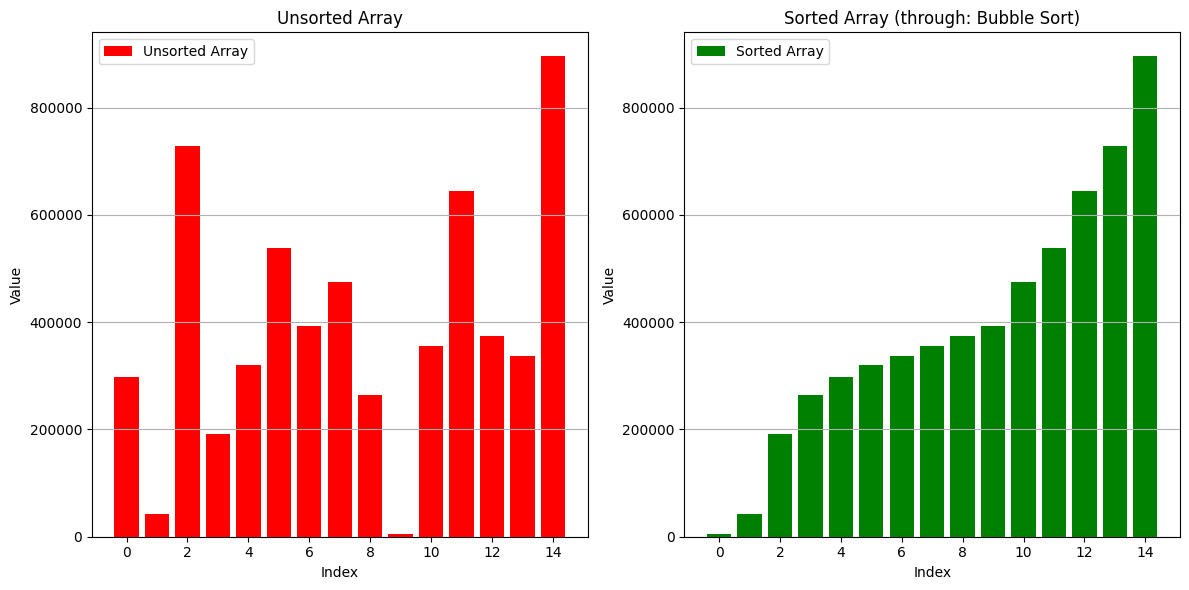


Thank you! Exiting the menu.


In [33]:
if __name__ == "__main__":
    sorting = Sorting()
    
    while True:
        print("> Please, choose a sorting algorithm:")
        print("1. Bubble Sort")
        print("2. Selection Sort")
        print("3. Insertion Sort")
        print("4. Merge Sort")
        print("5. Quick Sort")
        print("6. Heap Sort")
        print("7. Counting Sort")
        print("8. Radix Sort")
        print("9. Bucket Sort")
        print("0. Exit")
        print()

        choice = input("Enter the number corresponding to the algorithm: ")

        if choice == "0":
            print("\nExiting the menu. Goodbye!")

            break
        
        algorithms = {
            "1": "bubble_sort",
            "2": "selection_sort",
            "3": "insertion_sort",
            "4": "merge_sort",
            "5": "quick_sort",
            "6": "heap_sort",
            "7": "counting_sort",
            "8": "radix_sort",
            "9": "bucket_sort"
        }
        
        if choice not in algorithms:
            print("\nInvalid choice! Please select a valid algorithm.\n")

            continue
        
        print(f"You chose {algorithms[choice].replace('_', ' ').title()}.")

        # Asking for input size
        size = input("\nEnter the size of the array to be sorted (e.g., 100, 500, 1000): ")
        
        try:
            size = int(size)

            if size <= 0:
                print("\nInvalid size! Please enter a positive integer.\n")
            
                continue
        except ValueError:
            print("\nInvalid input! Please enter a valid integer.\n")
            
            continue
        
        # Executing and time the algorithm
        execution_times, unsorted_array, sorted_array = sorting.evaluate_algorithms_choice_based([size], algorithms[choice], choice)

        print("\n> Execution Time")
        print(execution_times)

        # For, testing
        # import numpy as np
        
        # print()
        # print(np.array(unsorted_array).shape)
        # print(np.array(sorted_array).shape)

        # Plotting the sorted and unsorted arrays
        print("\n> Sorted and Unsorted Array Visualization")
        visualize_arrays(sorted_array, unsorted_array, algorithms[choice].replace('_', ' ').title())
        
        # Asking if the user wants to continue
        continue_choice = input("\nWould you like to sort again? (yes/no): ").lower()
        if continue_choice != "yes" or continue_choice != "y":
            print("\nThank you! Exiting the menu.")
 
            break

### _Driver Code: Generating Execution Time Data for a Sequence of Input Lenghts_

In [32]:
if __name__ == "__main__":
    sorting = Sorting()
    
    sizes = [100, 500, 1000]
    algorithms = ['Bubble Sort', 'Selection Sort', 'Insertion Sort', 'Merge Sort', 'Quick Sort',
              'Heap Sort', 'Counting Sort', 'Bucket Sort', 'Radix Sort']
    
    execution_times, unsorted_arrays, sorted_arrays = sorting.evaluate_algorithms(sizes)

    # print(len(sorted_arrays))   # For, testing

    plot_execution_times(execution_times)
    plot_multiple_unsorted_lists(unsorted_arrays, sizes)
    plot_multiple_sorted_lists_utility(sorted_arrays, algorithms, sizes)